In [1]:
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = "retina"

In [4]:
def plot_fields(x, y, displacement, stress, sup_title):
    """Contour 2 displacement fields, 3 stress fields, and quiver displacements"""
    x_lim = np.array([x.min(), x.max()])
    y_lim = np.array([y.min(), y.max()])

    def style_plots():
        """Common plot elements"""
        plt.gca().set_aspect("equal")
        plt.xticks([x_lim[0], x_lim[1]])
        plt.yticks([y_lim[0], y_lim[1]])

    def plot_subplot(x, y, idx, field, title):
        """Common elements for each subplot - other than quiver"""
        plt.subplot(2, 3, idx)
        field_max = np.max(np.abs(field))
        scale = 5e-1
        plt.contourf(
            x,
            y,
            field.reshape(x.shape),
            n_contours,
            vmin=-scale * field_max,
            vmax=scale * field_max,
            cmap=plt.get_cmap("RdYlBu"),
        )
        plt.clim(-scale * field_max, scale * field_max)
        plt.colorbar(fraction=0.046, pad=0.04, extend="both")

        plt.contour(
            x,
            y,
            field.reshape(x.shape),
            n_contours,
            vmin=-scale * field_max,
            vmax=scale * field_max,
            linewidths=0.25,
            colors="k",
        )

        # for element in elements:
        #     plt.plot(
        #         [element["x1"], element["x2"]],
        #         [element["y1"], element["y2"]],
        #         "-k",
        #         linewidth=1.0,
        #     )
        plt.title(title)
        style_plots()

    plt.figure(figsize=(12, 8))
    n_contours = 10
    plot_subplot(x, y, 2, displacement[0, :], "x displacement")
    plot_subplot(x, y, 3, displacement[1, :], "y displacement")
    plot_subplot(x, y, 4, stress[0, :], "xx stress")
    plot_subplot(x, y, 5, stress[1, :], "yy stress")
    plot_subplot(x, y, 6, stress[2, :], "xy stress")

    plt.subplot(2, 3, 1)
    # for element in elements:
    #     plt.plot(
    #         [element["x1"], element["x2"]],
    #         [element["y1"], element["y2"]],
    #         "-k",
    #         linewidth=1.0,
    #     )

    plt.quiver(x, y, displacement[0], displacement[1], units="width", color="b")

    plt.title("vector displacement")
    plt.gca().set_aspect("equal")
    plt.xticks([x_lim[0], x_lim[1]])
    plt.yticks([y_lim[0], y_lim[1]])
    plt.suptitle(sup_title)
    plt.tight_layout()
    plt.show(block=False)


# def plot_element_geometry(elements):
#     """Plot element geometry"""
#     for element in elements:
#         plt.plot(
#             [element["x1"], element["x2"]],
#             [element["y1"], element["y2"]],
#             "-k",
#             color="r",
#             linewidth=0.5,
#         )
#         plt.plot(
#             [element["x1"], element["x2"]],
#             [element["y1"], element["y2"]],
#             "r.",
#             markersize=1,
#             linewidth=0.5,
#         )

#     # Extract and plot unit normal vectors
#     x_center = np.array([_["x_center"] for _ in elements])
#     y_center = np.array([_["y_center"] for _ in elements])
#     x_normal = np.array([_["x_normal"] for _ in elements])
#     y_normal = np.array([_["y_normal"] for _ in elements])
#     plt.quiver(
#         x_center, y_center, x_normal, y_normal, units="width", color="gray", width=0.002
#     )

#     for i, element in enumerate(elements):
#         plt.text(
#             element["x_center"],
#             element["y_center"],
#             str(i),
#             horizontalalignment="center",
#             verticalalignment="center",
#             fontsize=8,
#         )

#     plt.xlabel("x")
#     plt.ylabel("y")
#     plt.title("element geometry and normals")
#     plt.gca().set_aspect("equal")
#     plt.show(block=False)


/Users/meade/mambaforge/lib/python3.9/site-packages/matplotlib/transforms.py:2663: RuntimeWarning: divide by zero encountered in double_scalars
  y_scale = 1.0 / inh
/Users/meade/mambaforge/lib/python3.9/site-packages/matplotlib/transforms.py:2665: RuntimeWarning: invalid value encountered in double_scalars
  [0.0    , y_scale, (-inb*y_scale)],
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


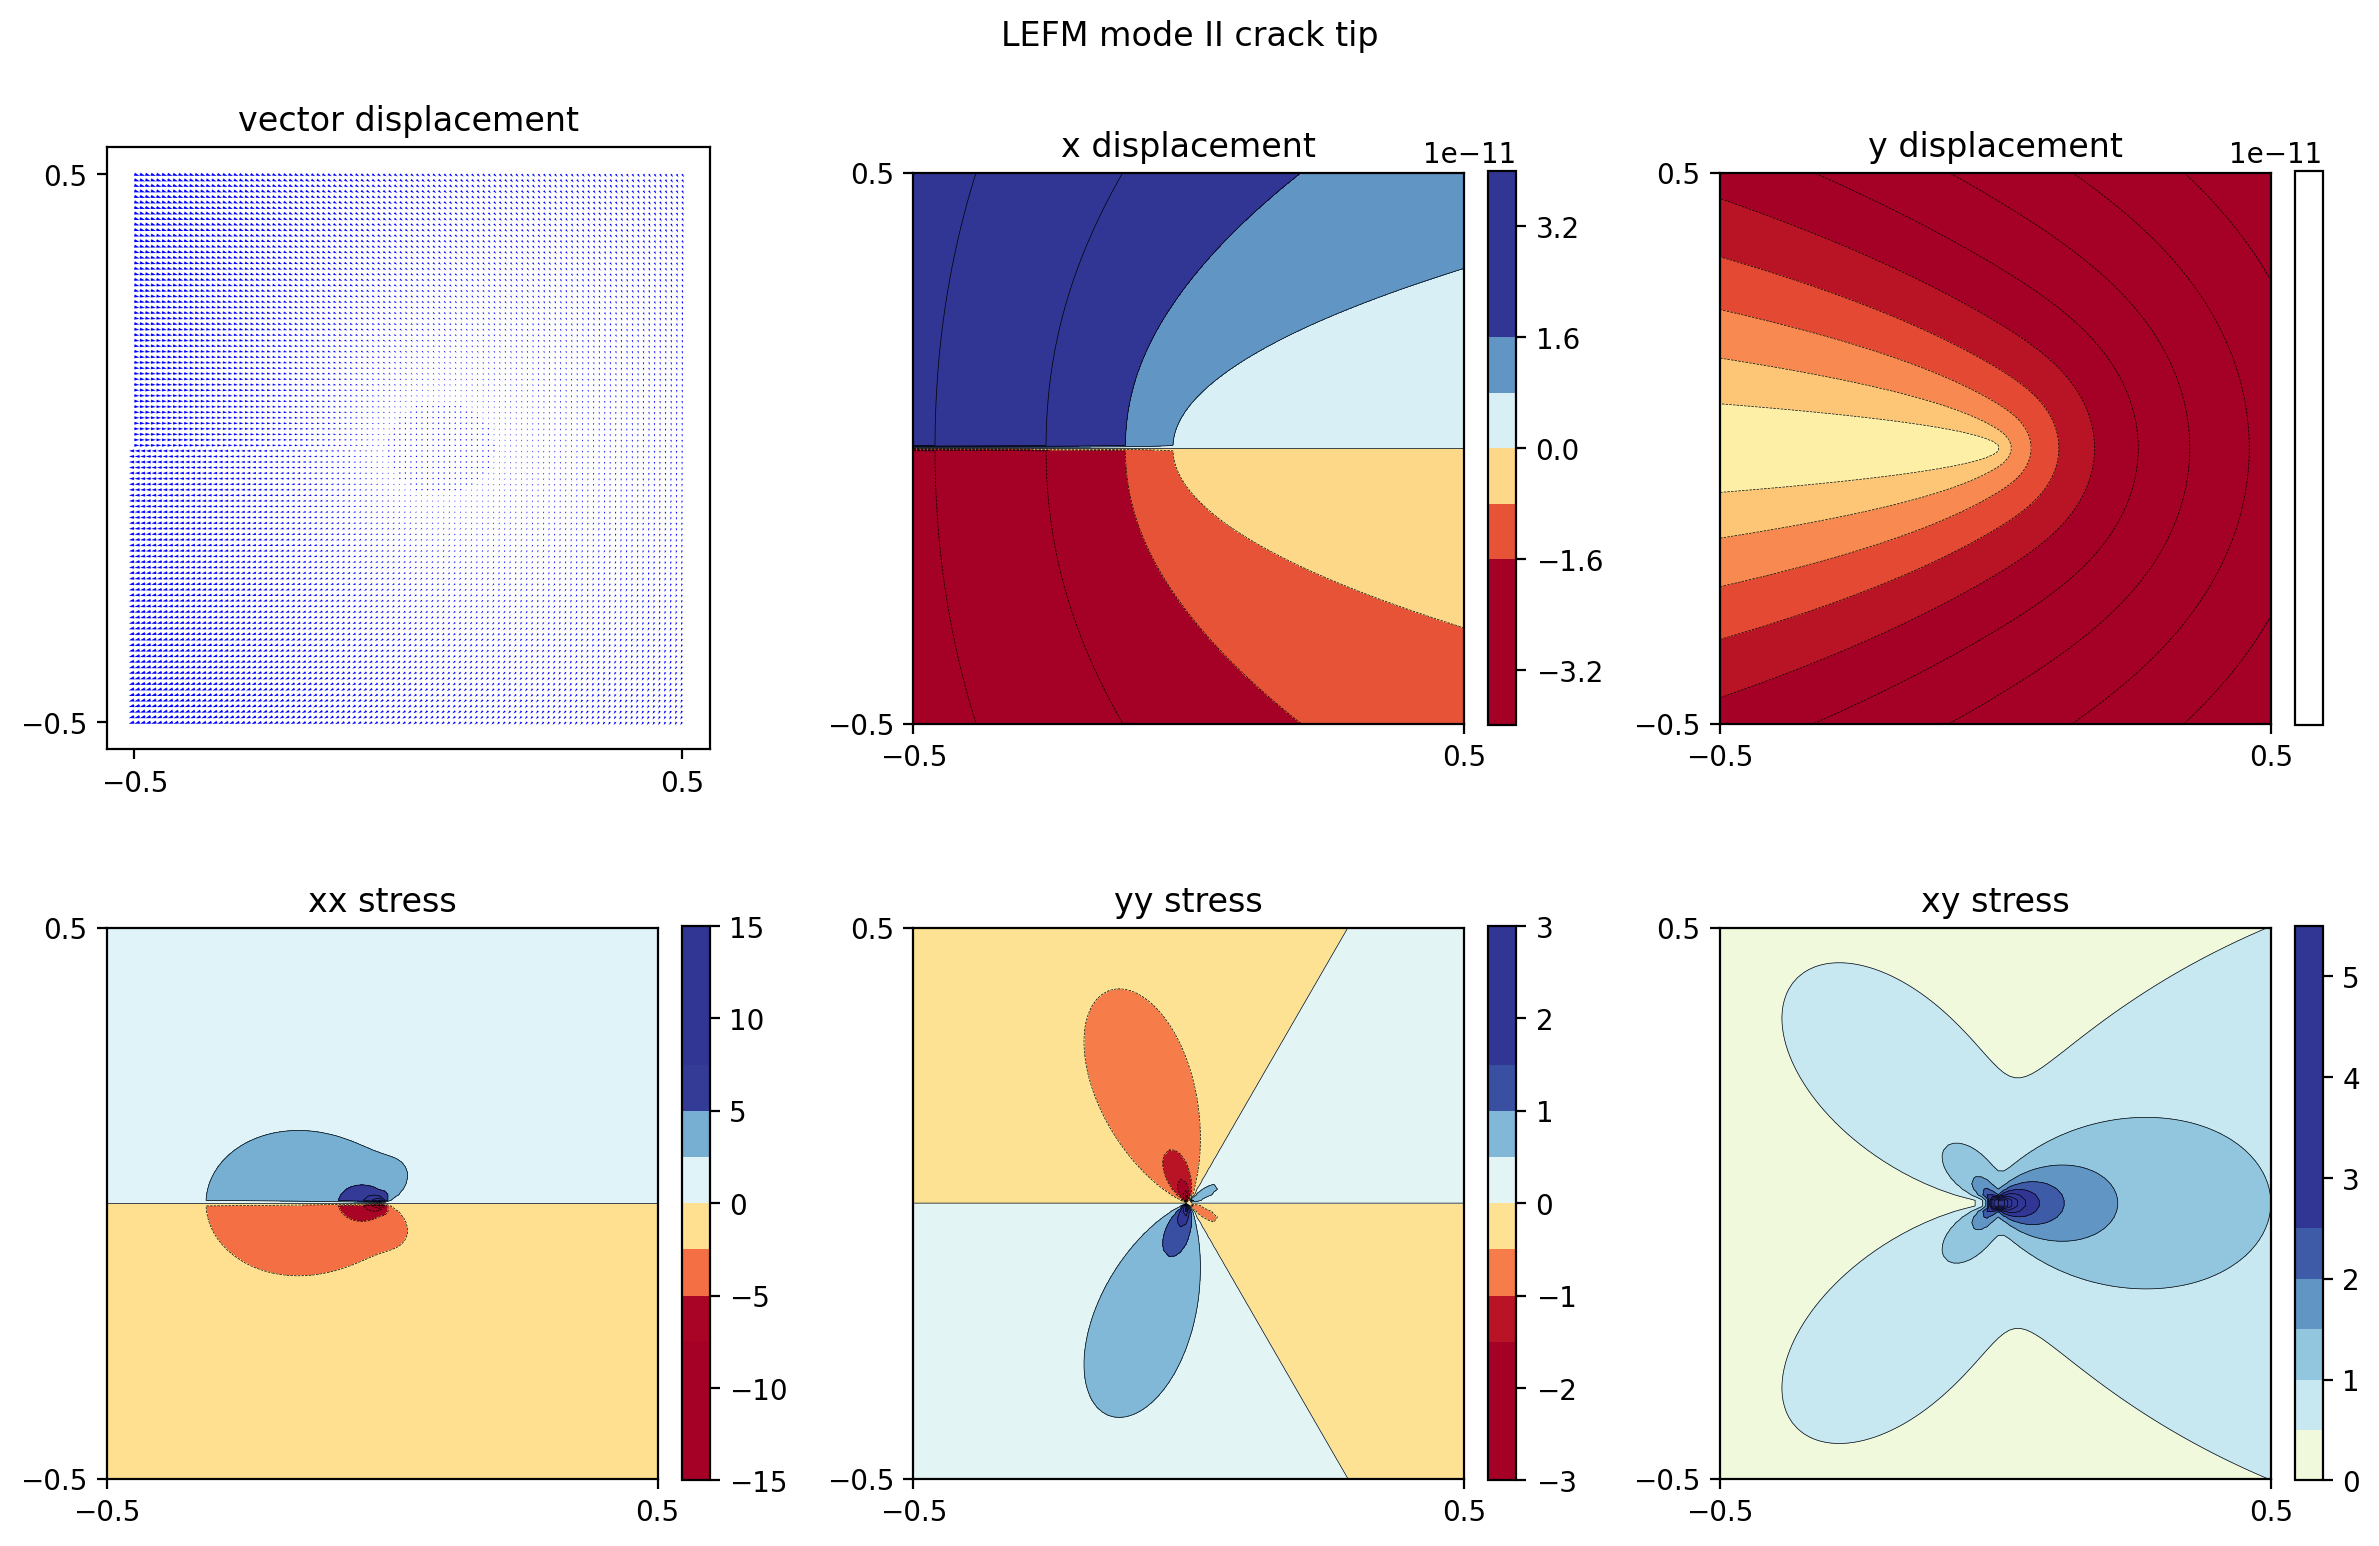

In [5]:
tau = 1.0
a = 1.0
nu = 0.25
mu = 3e10
K_II = tau * np.sqrt(np.pi * a)

n_pts = 100
x_vec = np.linspace(-0.5, 0.5, n_pts)
y_vec = np.linspace(-0.5, 0.5, n_pts)
x_mat, y_mat = np.meshgrid(x_vec, y_vec)
r_mat = np.sqrt(x_mat**2 + y_mat**2.0)
theta_mat = np.arctan2(y_mat, x_mat)
x = x_mat.flatten()
y = y_mat.flatten()
r = r_mat.flatten()
theta = theta_mat.flatten()

u_x = (
    K_II
    / mu
    * np.sqrt(r / (2 * np.pi))
    * (2 - 2 * nu * np.cos(theta / 2.0) ** 2.0)
    * np.sin(theta / 2.0)
)

u_y = (
    K_II
    / mu
    * np.sqrt(r / (2 * np.pi))
    * (-1 - 2 * nu * np.sin(theta / 2.0) ** 2.0)
    * np.cos(theta / 2.0)
)

sigma_xx = (
    K_II
    / np.sqrt(2 * np.pi * r)
    * np.sin(theta / 2.0)
    * (2 + np.cos(theta / 2.0) * np.cos(3.0 * theta / 2.0))
)

sigma_yy = (
    K_II
    / np.sqrt(2 * np.pi * r)
    * np.sin(theta / 2.0)
    * np.cos(theta / 2.0)
    * np.cos(3.0 * theta / 2.0)
)

sigma_xy = (
    K_II
    / np.sqrt(2 * np.pi * r)
    * np.cos(theta / 2.0)
    * (1 - np.sin(theta / 2.0) * np.sin(3.0 * theta / 2.0))
)

displacement_crack = np.vstack((u_x, u_y))
stress_crack = np.vstack((sigma_xx, sigma_yy, sigma_xy))

plot_fields(
    x_mat,
    y_mat,
    displacement_crack,
    stress_crack,
    "LEFM mode II crack tip",
)


In [ ]:
stress_crack.shape


(3, 10000)